In [120]:
import numpy as np
import pandas as pd

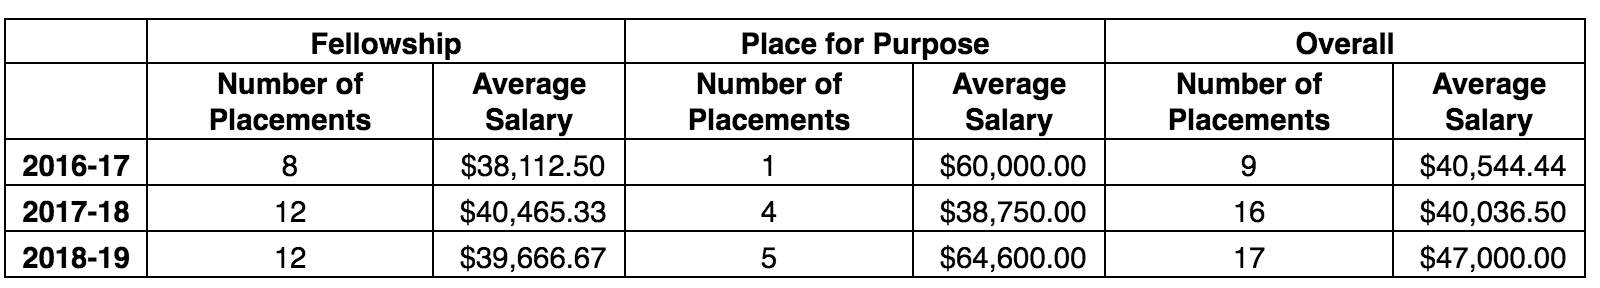

In [171]:
from IPython.display import Image
Image('sflamangtable.png')

In [225]:
# test before replacing



In [245]:
agency = ["Mayor's Office","Mayor's Office",'MOED','MOED','BCHD','BCHD','BCHD','BCHD',
          'BCHD','BCHD','BCHD','BCHD','BCHD','BCHD','BCHD','MOED','BPD',
          'City Hall: Z.Cohen','BCPS','Human Services','BCHD','BCHD','BCHD','BCHD',
          'BCHD','BCHD','BCHD','BCPS','City Hall: Z.Cohen','City Hall: Z.Cohen','DGS',
          'BCF','MOCJ','MOED','MOED','MOED','MOED','DGS','DGS','DGS','BBMR','BBMR',
          'BCHD','BCHD','BCHD','BCHD','BCHD','MOCJ','MIMA','City Hall: Z.Cohen','BCF','BCHD']

funding = ['Contractual','Contractual','BoE','BoE','BoE','BoE','BoE','BoE','BoE',
           'BoE','BoE','BoE','BoE','BoE','BoE','BoE','BoE','Grant Funded','Grant Funded',
           'BoE','BoE','BoE','BoE','BoE','BoE','BoE','BoE','Grant Funded','Grant Funded',
           'Grant Funded','BoE','Grant Funded','BoE','Grant Funded','Grant Funded',
           'Grant Funded','Grant Funded','BoE','BoE','BoE','BoE','BoE','BoE','BoE','BoE',
           'BoE','BoE','Family Leauge','BoE','Grant Funded','BCF','BoE' ]

program = ['Fellowship','Fellowship','Fellowship','Fellowship','Fellowship','Fellowship',
           'Fellowship','Fellowship','Fellowship','Fellowship','Fellowship','Fellowship',
           'Fellowship','Fellowship','Fellowship','Fellowship','Fellowship','Fellowship',
           'Place4Purpose','Fellowship','Fellowship','Fellowship','Fellowship','Fellowship',
           'Fellowship','Fellowship','Fellowship','Fellowship','Fellowship','Fellowship',
           'Fellowship','Place4Purpose','Place4Purpose','Place4Purpose','Place4Purpose',
           'Fellowship','Fellowship','Fellowship','Fellowship','Fellowship','Fellowship',
           'Fellowship','Fellowship','Fellowship','Fellowship','Fellowship','Fellowship',
           'Place4Purpose','Place4Purpose','Place4Purpose','Place4Purpose','Place4Purpose']

year = [2014,2014,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,
        2016,2016,2016,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
        2017,2017,2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,
        2018,2018,2018,2018]



In [246]:
datetime_year = pd.to_datetime(year, format='%Y')
dframe = pd.DataFrame(agency, index=datetime_year, columns=['agency'])
dframe['funding'] = funding
dframe['program'] = program

In [247]:
dframe.head()

,agency,funding,program
2014-01-01,Mayor's Office,Contractual,Fellowship
2014-01-01,Mayor's Office,Contractual,Fellowship
2015-01-01,MOED,BoE,Fellowship
2015-01-01,MOED,BoE,Fellowship
2015-01-01,BCHD,BoE,Fellowship


In [248]:
avg_stipend =  (np.where(dframe.index == pd.to_datetime('2014'),32000,
                np.where(dframe.index == pd.to_datetime('2015'),33000,
                np.where((dframe.index == pd.to_datetime('2016')) & (dframe['program'] == 'Fellowship'),38112.50,
                np.where((dframe.index == pd.to_datetime('2016')) & (dframe['program'] == 'Place4Purpose'),60000,
                np.where((dframe.index == pd.to_datetime('2017')) & (dframe['program'] == 'Fellowship'),40465.33,
                np.where((dframe.index == pd.to_datetime('2017')) & (dframe['program'] == 'Place4Purpose'),38750,
                np.where((dframe.index == pd.to_datetime('2018')) & (dframe['program'] == 'Fellowship'),39666.67,
                np.where((dframe.index == pd.to_datetime('2018')) & (dframe['program'] == 'Place4Purpose'),64600,None)))))))))

## use average stipend for each program for the fellow stipend ## 
dframe['stipend'] = avg_stipend
dframe['fringe'] = dframe['stipend'] * .22
dframe['unemployment'] = 1000
dframe['BaltCorps_fee'] = 2000
dframe['StrongCity_fee'] = 2000
dframe['fellow_cost'] = (
    dframe['stipend'] + dframe['fringe'] + dframe['unemployment'] + 
    dframe['BaltCorps_fee'] + dframe['StrongCity_fee'])

In [249]:
dframe.index.value_counts()

2018-01-01    17
2017-01-01    16
2016-01-01     9
2015-01-01     8
2014-01-01     2
dtype: int64

In [244]:
dframe.head(5)

,agency,funding,program,stipend,fringe,unemployment,BaltCorps_fee,StrongCity_fee,fellow_cost
2014-01-01,Mayor's Office,Contractual,Fellowship,32000,7040,1000,2000,2000,44040
2014-01-01,Mayor's Office,Contractual,Fellowship,32000,7040,1000,2000,2000,44040
2015-01-01,MOED,BoE,Fellowship,33000,7260,1000,2000,2000,45260
2015-01-01,MOED,BoE,Fellowship,33000,7260,1000,2000,2000,45260
2015-01-01,BCHD,BoE,Fellowship,33000,7260,1000,2000,2000,45260
